<a href="https://colab.research.google.com/github/Vovladimir/algorithms_data_analysis/blob/lesson2/%D0%A3%D1%80%D0%BE%D0%BA2_%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [356]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [357]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [358]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [359]:
X_st[1].mean(), X_st[1].std()

(3.3306690738754695e-17, 1.0)

In [360]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


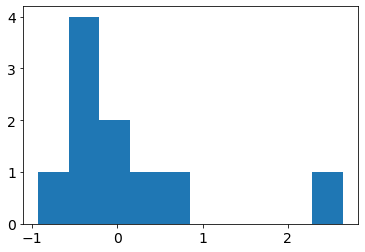

In [361]:
plt.hist(X_st[1]);

In [362]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [363]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

## Домашние задания

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).

5. *Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).

In [364]:
# 1. Задание


In [365]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, plot=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    w_list = []
    lambda_list = []
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        new_W = W - alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        w_list.append(new_W.copy())
        lambda_list.append(2*lambda_*W)
        W = new_W
        # if i % (iterations / 10) == 0:
        #     print(i, W, err)
    w_list = np.array(w_list)
    lambda_list = np.array(lambda_list)
    plt.figure(figsize=(13, 6))
    if plot == 0:
      plt.xlabel(r'Веса')
      plt.ylabel(r'Параметр регуляризации')      
      # plt.plot(w_list)
      plt.scatter(w_list[:,0], lambda_list[:,0])
      plt.scatter(w_list[:,1], lambda_list[:,1])
    if plot == 1:
      plt.xlabel(r'Количество итераций')
      plt.ylabel(r'Веса')
      plt.plot(w_list)
    return f'Итоговые веса = {W}'

'Итоговые веса = [57.34265723  5.7524461   1.8700797   4.03498288]'

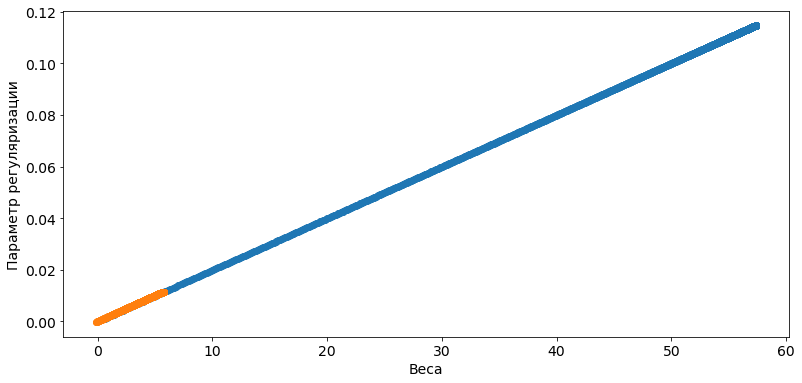

In [366]:
eval_model_reg2(X_st, y, iterations=10000, alpha=1e-3, lambda_=0.001)

In [367]:
# 2. Задание

In [368]:
def min_max_norm(x):
  res = (x - x.min()) / (x.max() - x.min())
  return res


In [369]:
X1_norm = min_max_norm(X[1])
X1_norm

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

(array([1., 4., 3., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

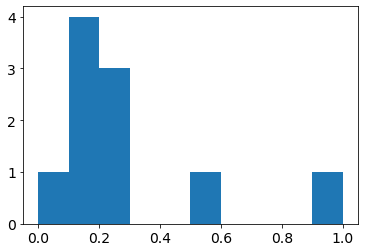

In [370]:
plt.hist(X1_norm)

In [371]:
X1_std = calc_std_feat(X1_norm)

(array([1., 4., 3., 0., 1., 0., 0., 0., 0., 1.]),
 array([-0.92857143, -0.57142857, -0.21428571,  0.14285714,  0.5       ,
         0.85714286,  1.21428571,  1.57142857,  1.92857143,  2.28571429,
         2.64285714]),
 <a list of 10 Patch objects>)

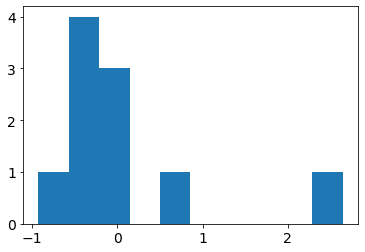

In [372]:
plt.hist(X1_std)

In [373]:
# 3. Задание

In [374]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, plot=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    w_list = []
    lambda_list = []
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        new_W = W - alpha * (1/n * 2 * np.dot((y_pred - y), X.T) +  lambda_ * np.sign(W)) 
        w_list.append(new_W.copy())
        W = new_W
        lambda_list.append(lambda_*np.sign(W))
        # if i % (iterations / 10) == 0:
        #     print(i, W, err)
    w_list = np.array(w_list)
    lambda_list = np.array(lambda_list)
    plt.figure(figsize=(13, 6))
    if plot == 0:
      plt.xlabel(r'Веса')
      plt.ylabel(r'Параметр регуляризации')      
      # plt.plot(w_list)
      plt.scatter(w_list[:,0], lambda_list[:,0])
      plt.scatter(w_list[:,1], lambda_list[:,1])
    if plot == 1:
      plt.xlabel(r'Количество итераций')
      plt.ylabel(r'Веса')
      plt.plot(w_list)
    if plot == 3:
      plt.scatter(w_list[:,0], w_list[:,1])
    return f'Итоговые веса = {W}'

'Итоговые веса = [49.70051363  3.66420465  3.48134702  4.46121443]'

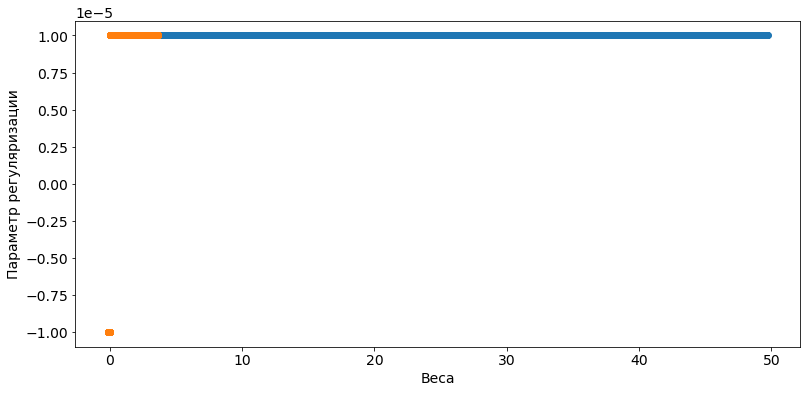

In [375]:
eval_model_reg1(X_st, y, iterations=10000, lambda_=0.00001)

4. Задание

'Итоговые веса = [49.70051363  3.66420465  3.48134702  4.46121443]'

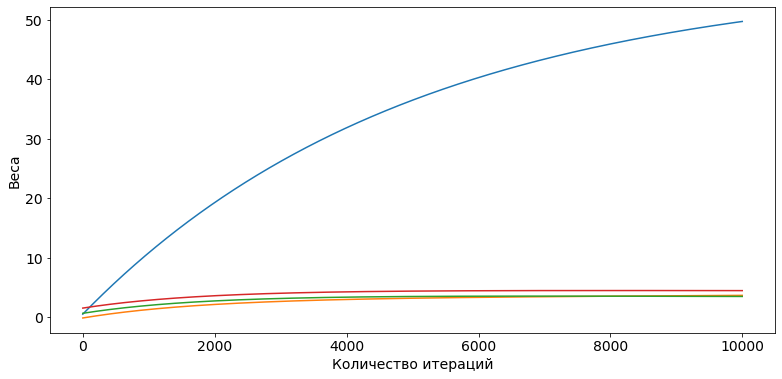

In [376]:
eval_model_reg1(X_st, y, iterations=10000, lambda_=0.00001, plot=True)

'Итоговые веса = [57.39942589  5.76569745  1.85695393  4.03919918]'

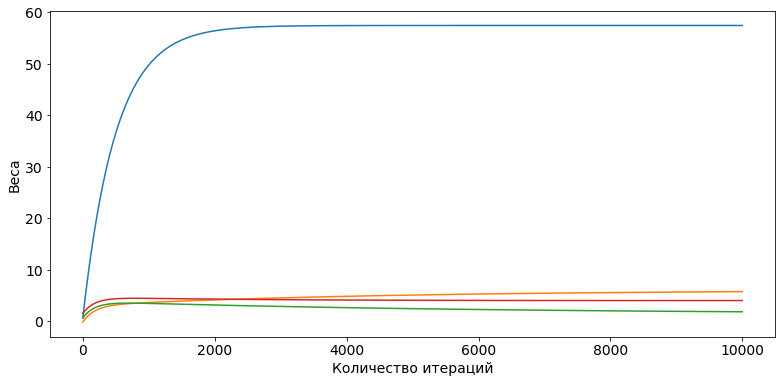

In [377]:
eval_model_reg2(X_st, y, iterations=10000, alpha=1e-3, lambda_=0.00001,plot=True)

In [378]:
# 5. Задание

In [379]:
# Метод стохастического градиентного спуска (mini-batch SGD)
def eval_SGD(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0]) # начальное приближение весов
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    w_list = []
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
            w_list.append(W.copy())
        if i % (iterations / 10) == 0:
            print(i, W, err)
    w_list = np.array(w_list)
    plt.figure(figsize=(13, 6))
    plt.scatter(w_list[:,0], w_list[:,1])
    return W

100 [10.8180538   1.29708149  1.98771474  2.85579396] 2313.447900382401
200 [19.26728006  2.14818814  2.73911058  3.6095245 ] 1485.3622747585566
300 [26.18395752  2.6633213   3.1529941   4.03134273] 966.0865193677895
400 [31.84606228  2.98501903  3.37351129  4.26309259] 634.9580889303085
500 [36.48115179  3.19511829  3.48339473  4.38617789] 421.74894986743567
600 [40.2755092   3.34060674  3.53012056  4.44730514] 283.805256121405
700 [43.38162939  3.44846526  3.54092595  4.47326314] 194.4484902168637
800 [45.92434744  3.53418945  3.53143093  4.47940828] 136.6625892872769
900 [48.00585546  3.606682    3.51058804  4.47453575] 99.45587115636224
1000 [49.70980963  3.67106135  3.48352383  4.46367605] 75.67156859806016
CPU times: user 128 ms, sys: 10.5 ms, total: 138 ms
Wall time: 136 ms


array([49.70980963,  3.67106135,  3.48352383,  4.46367605])

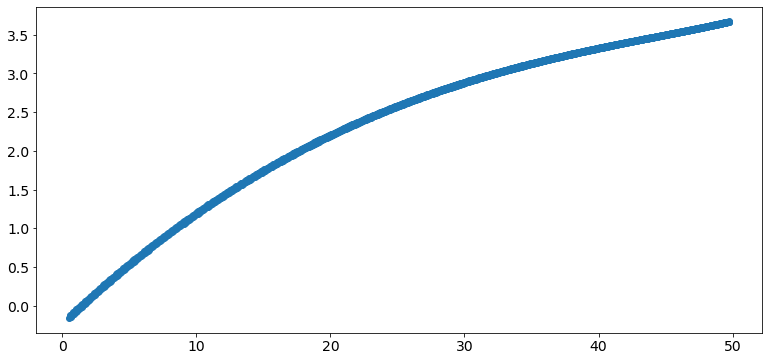

In [380]:
%%time

eval_SGD(X_st, y, iterations=1000, qty_in_batch=5, alpha=1e-3) # 100.15781666892349

'Итоговые веса = [49.70051363  3.66420465  3.48134702  4.46121443]'

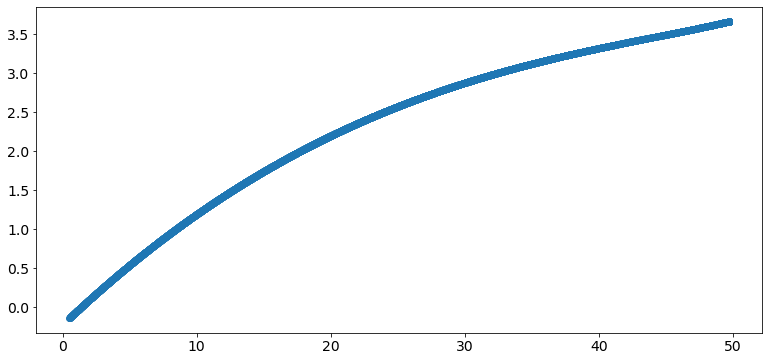

In [381]:
eval_model_reg1(X_st, y, iterations=10000, lambda_=0.00001, plot=3)